In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
player = pd.read_csv('data/baseball/player.csv')
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

In [103]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 21 columns):
year         100951 non-null int64
team_id      100951 non-null object
league_id    100214 non-null object
player_id    100951 non-null object
g_all        100748 non-null float64
gs           49030 non-null float64
g_batting    100951 non-null int64
g_defense    100748 non-null float64
g_p          100951 non-null int64
g_c          100951 non-null int64
g_1b         100951 non-null int64
g_2b         100951 non-null int64
g_3b         100951 non-null int64
g_ss         100951 non-null int64
g_lf         100951 non-null int64
g_cf         100951 non-null int64
g_rf         100951 non-null int64
g_of         100951 non-null int64
g_dh         49233 non-null float64
g_ph         49233 non-null float64
g_pr         42945 non-null float64
dtypes: float64(6), int64(12), object(3)
memory usage: 16.2+ MB


## Players

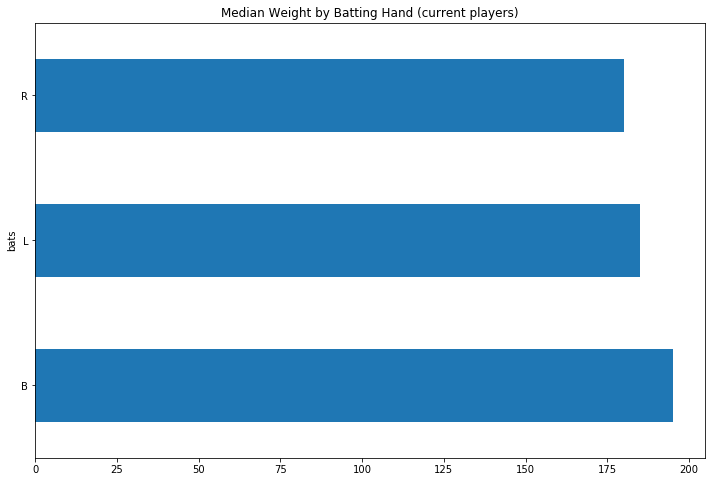

In [104]:
player_current = player[player.final_game.isnull()]
player_current.groupby('bats')['weight'].median().plot(kind='barh', figsize=(12,8),
                                                       title='Median Weight by Batting Hand (current players)')

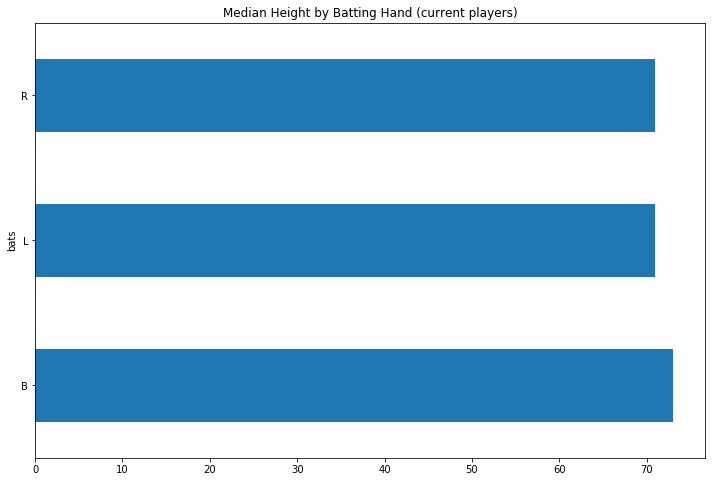

In [105]:
player_current = player[player.final_game.isnull()]
player_current.groupby('bats')['height'].median().plot(kind='barh', figsize=(12,8),
                                                       title='Median Height by Batting Hand (current players)')

## Batting

In [106]:
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['avg'] = batting.h / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['ops'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3 + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['woba'] = (batting.h*0.9 + batting.double*0.34 + batting.triple*0.66 + batting.hr*1.05 + batting.bb*0.72 + batting.hbp*0.75) / (batting.ab + batting.bb + batting.hbp)

In [107]:
slug = batting.groupby('year')['slug'].median()
avg = batting.groupby('year')['avg'].median()
obp = batting.groupby('year')['obp'].median()
ops = batting.groupby('year')['ops'].median()
woba = batting.groupby('year')['woba'].median()

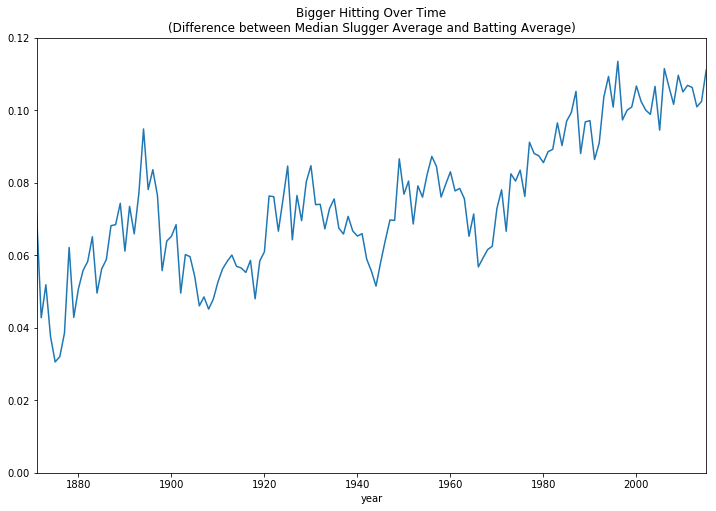

In [108]:
(slug - avg).plot(figsize=(12,8),
                  title='Bigger Hitting Over Time\n(Difference between Median Slugger Average and Batting Average)',
                 ylim=(0,0.12))

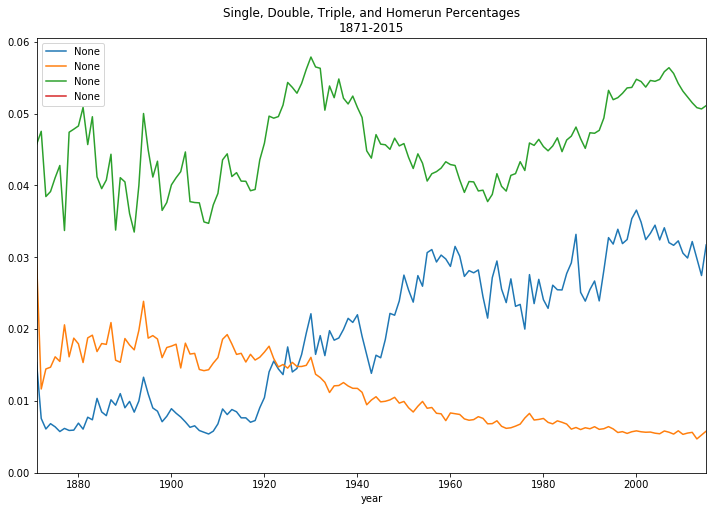

In [109]:
batting['single'] = batting.h - batting.hr - batting.double - batting.triple
hr = batting[batting.hr > 0]
hrs = hr.groupby('year')['hr'].sum()
triples = hr.groupby('year')['triple'].sum()
doubles = hr.groupby('year')['double'].sum()
singles = hr.groupby('year')['single'].sum()
ab = hr.groupby('year')['ab'].sum()

(hrs/ab).plot(figsize=(12,8), legend=True, title='Single, Double, Triple, and Homerun Percentages\n1871-2015')
(triples/ab).plot(figsize=(12,8), legend=True)
(doubles/ab).plot(figsize=(12,8), legend=True, ylim=0)
(singles/ab).plot(figsize=(12,8), legend=True, ylim=0)

In [156]:
batting_2015 = batting[(batting.year == 2015) &
                       (batting.ab > 200)]
batting_2015['bb_avg'] = batting_2015.bb / batting_2015.ab
batting_2015['hr_avg'] = batting_2015.hr / batting_2015.ab
batting_2015['single_avg'] = batting_2015.single / batting_2015.ab
batting_2015['triple_avg'] = batting_2015.triple / batting_2015.ab
batting_2015['double_avg'] = batting_2015.double / batting_2015.ab

C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


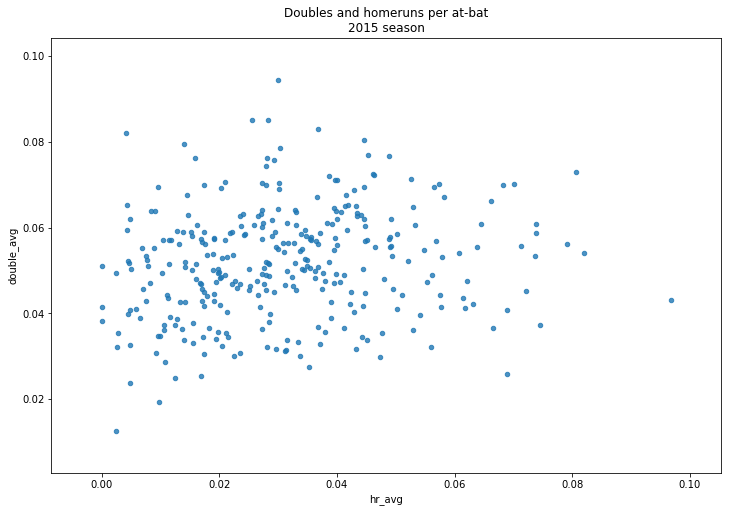

In [157]:
batting_2015.plot(x='hr_avg', y='double_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Doubles and homeruns per at-bat\n2015 season')

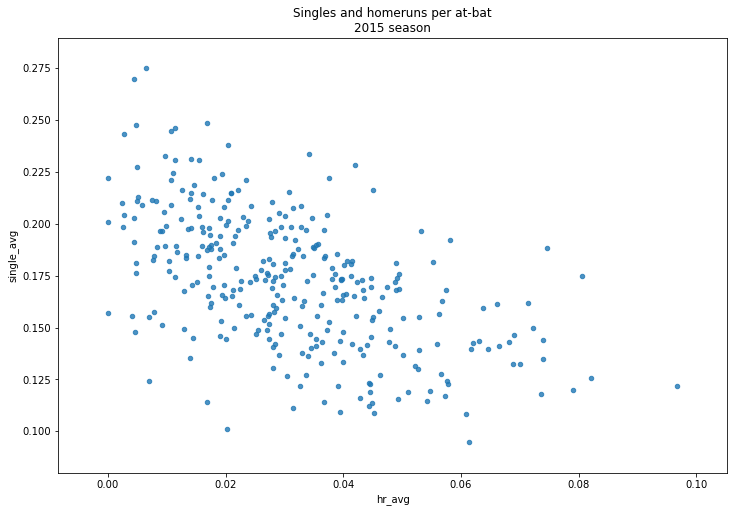

In [158]:
batting_2015.plot(x='hr_avg', y='single_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Singles and homeruns per at-bat\n2015 season')

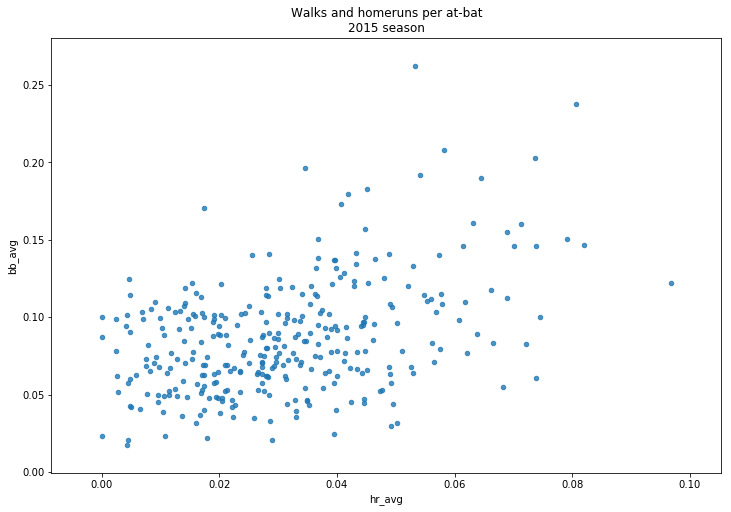

In [159]:
batting_2015.plot(x='hr_avg', y='bb_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Walks and homeruns per at-bat\n2015 season')

### Explanation for Reduced Triples

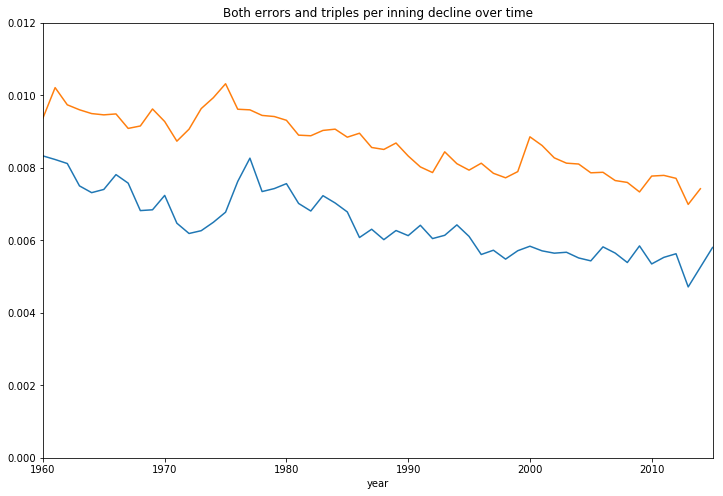

In [129]:
fielding = fielding[(fielding.inn_outs > 0) & (fielding.year > 1959)]
batting = batting[batting.year > 1959]
inns = fielding.groupby('year')['inn_outs'].sum()/3
errors = fielding.groupby('year')['e'].sum()

(triples/ab).plot(figsize=(12,8), xlim=(1960,2015), ylim=(0,.012))
(errors/inns).plot(figsize=(12,8), xlim=(1960,2015), title='Both errors and triples per inning decline over time')

In [128]:
career_batting = batting.groupby('player_id').sum()
career_batting = career_batting[career_batting.ab > 1000]
career_batting.hr.sort_values(ascending=False).head(10)

player_id
bondsba01    762.0
rodrial01    687.0
griffke02    630.0
thomeji01    612.0
sosasa01     609.0
mcgwima01    583.0
aaronha01    576.0
palmera01    569.0
jacksre01    563.0
pujolal01    560.0
Name: hr, dtype: float64

In [124]:
batting_player = batting.merge(player)

In [114]:
year_2015 = batting_player[batting_player.year == 2015]
year_2015.groupby('bats').size()

bats
B    111
L    426
R    949
dtype: int64

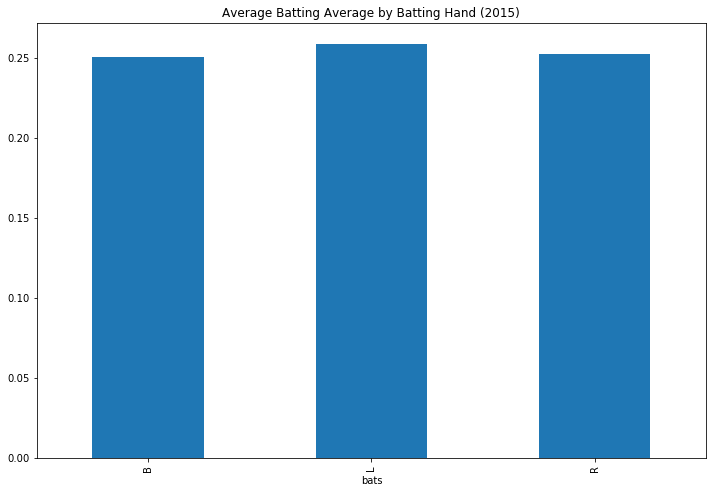

In [115]:
ab_2015 = year_2015.groupby('bats')['ab'].sum()
h_2015 = year_2015.groupby('bats')['h'].sum()
avg_2015 = h_2015 / ab_2015
avg_2015.plot(kind='bar', figsize=(12,8), title='Average Batting Average by Batting Hand (2015)')

In [116]:
batting_app = batting.merge(appearances)

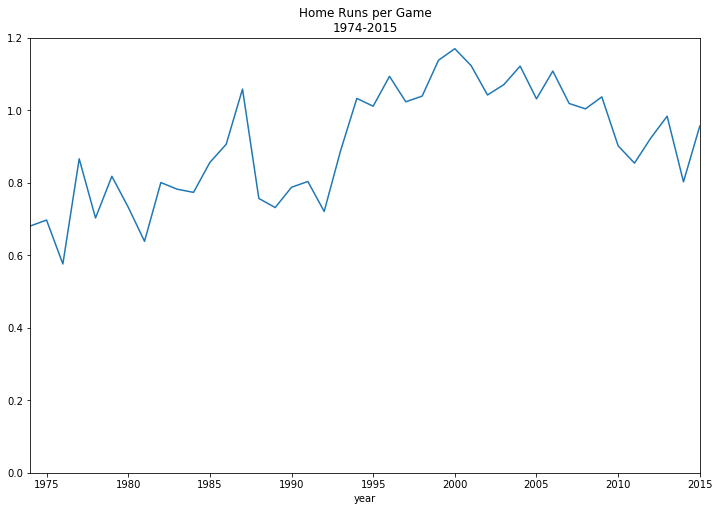

In [117]:
hr = batting_app.groupby('year')['hr'].sum()
gs = batting_app.groupby('year')['gs'].sum()
(hr/gs*9).plot(figsize=(12,8), title='Home Runs per Game\n1974-2015', ylim=0, xlim=(1974,2015))

## Pitching

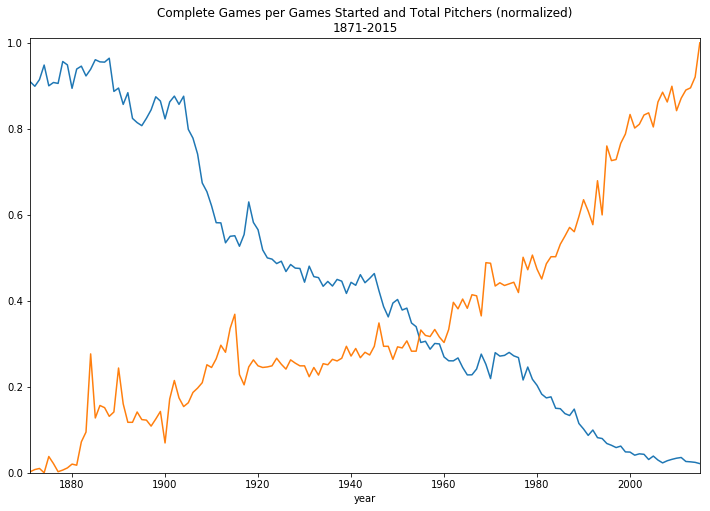

In [118]:
cg = pitching.groupby('year')['cg'].sum()
gs = pitching.groupby('year')['gs'].sum()
pitchers = pitching.groupby('year').size()
pitchers = (pitchers - min(pitchers)) / (max(pitchers) - min(pitchers))
(cg/gs).plot(figsize=(12,8), title='Complete Games per Games Started and Total Pitchers (normalized)\n1871-2015', ylim=0)
pitchers.plot(figsize=(12,8))

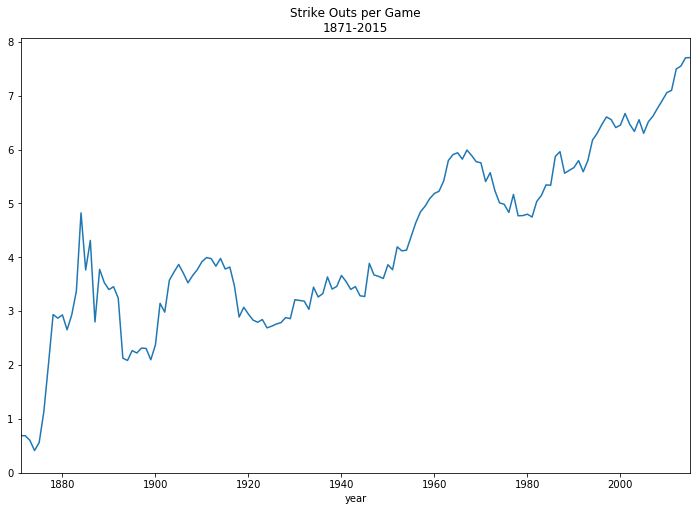

In [119]:
so = pitching.groupby('year')['so'].sum()
(so/gs).plot(figsize=(12,8), title='Strike Outs per Game\n1871-2015', ylim=0)

## Teams

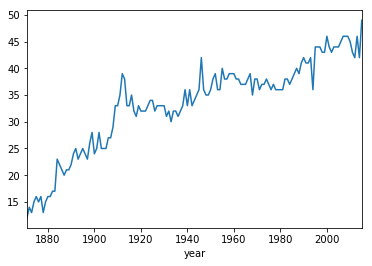

In [120]:
teams_per_year = appearances.groupby(['year','team_id']).size().groupby('year').size()
players_per_year = appearances.groupby('year').size()
players_per_team = players_per_year // teams_per_year
players_per_team.plot()